In [2]:
import pandas as pd
import numpy as np
from langdetect import detect

import json
import matplotlib.pyplot as plt
import plotly.graph_objects as go

import seaborn as sns
import re
import math
from collections import defaultdict, Counter

import utils
import required_variables
# from graph import create_graph

# Params & Vars

In [3]:
CHOSEN_CATEGORIES = True
LABELS_NEEDED_BEFORE = 626
ONLY_PARENT_CATEGORY = False
N_TO_SELECT = 10

# Data 

In [4]:
df = pd.read_csv('../data/en_data.csv', encoding='utf-8')

In [5]:
df = df[['sreid', 'srenext', 'textrecord', 'ocms', 'culture', 'place', 'pub.date', 'field.date', 'pub.lang']]

In [6]:
df['ocms_list'] = df['ocms'].str.split()
df['ocms_list'] = df['ocms_list'].apply(lambda x: [int(i) for i in x])

In [7]:
df.head(2)

sreid          srenext   
0  aa01-000-000178  aa01-000-000186  \
1  aa01-001-000341  aa01-001-000357   

                                          textrecord     ocms culture  place   
0  Before the 1900s, Koreans lived as subsistence...  241 433   Korea  Korea  \
1  {{245}} “Korea is richly endowed with fruits o...      245   Korea  Korea   

  pub.date field.date pub.lang   ocms_list  
0      NaN    no date  English  [241, 433]  
1      NaN  1890-1905  English       [245]

In [8]:
chosen_cat = 220

In [9]:
df = df[df.apply(lambda x: np.any([utils.get_parent_category_i(i) == chosen_cat for i in x.ocms_list]), axis=1)]

In [10]:
df

sreid          srenext   
6       aa01-001-000606  aa01-001-000626  \
7       aa01-001-000636  aa01-001-000658   
8       aa01-001-000706  aa01-001-000724   
9       aa01-001-000799  aa01-001-000819   
10      aa01-001-000819  aa01-001-000839   
...                 ...              ...   
183188  sv03-011-006185  sv03-011-006202   
183189  sv03-011-006202  sv03-011-006224   
183206  sv03-011-008485  sv03-011-008499   
183207  sv03-011-008622  sv03-011-008629   
183211  sx01-000-000181  sx01-000-000193   

                                               textrecord   
6       {{136}}  {{224}}  {{476}} “So much for domesti...  \
7       {{136}}  {{224}}  {{278}}  {{237}} “Deer are c...   
8       {{136}}  {{224}} “For its bird life, especiall...   
9       {{136}}  {{226}}  {{228}} “More important than...   
10      {{222}}  {{225}}  {{262}} “But fish and pearls...   
...                                                   ...   
183188  {{222 262}} Plant picking is not of much impor...   
183189  {{222 262}} A few wild plants, however, become...   
183206  {{226 262}} Despite the proximity of the sea, ...   
183207  {{262 226}} Mention has already been made of t...   
183211  Since 1959, the Cuban government has endeavore...   

                                   ocms   culture                    place   
6                           136 224 476     Korea                    Korea  \
7                       136 224 237 278     Korea                    Korea   
8                               136 224     Korea                    Korea   
9                           136 226 228     Korea                    Korea   
10                          222 225 262     Korea                    Korea   
...                                 ...       ...                      ...   
183188                          222 262  Haitians  Marbial, southern Haiti   
183189                          222 262  Haitians  Marbial, southern Haiti   
183206                          226 262  Haitians  Marbial, southern Haiti   
183207                          226 262  Haitians  Marbial, southern Haiti   
183211  179 226 241 316 439 485 648 657    Cubans                     Cuba   

       pub.date field.date pub.lang                                 ocms_list  
6           NaN  1890-1905  English                           [136, 224, 476]  
7           NaN  1890-1905  English                      [136, 224, 237, 278]  
8           NaN  1890-1905  English                                [136, 224]  
9           NaN  1890-1905  English                           [136, 226, 228]  
10          NaN  1890-1905  English                           [222, 225, 262]  
...         ...        ...      ...                                       ...  
183188     1951    no date  English                                [222, 262]  
183189     1951    no date  English                                [222, 262]  
183206     1951    no date  English                                [226, 262]  
183207     1951    no date  English                                [226, 262]  
183211      NaN    no date  English  [179, 226, 241, 316, 439, 485, 648, 657]  

[84664 rows x 10 columns]

In [11]:
N_TO_SELECT = 10

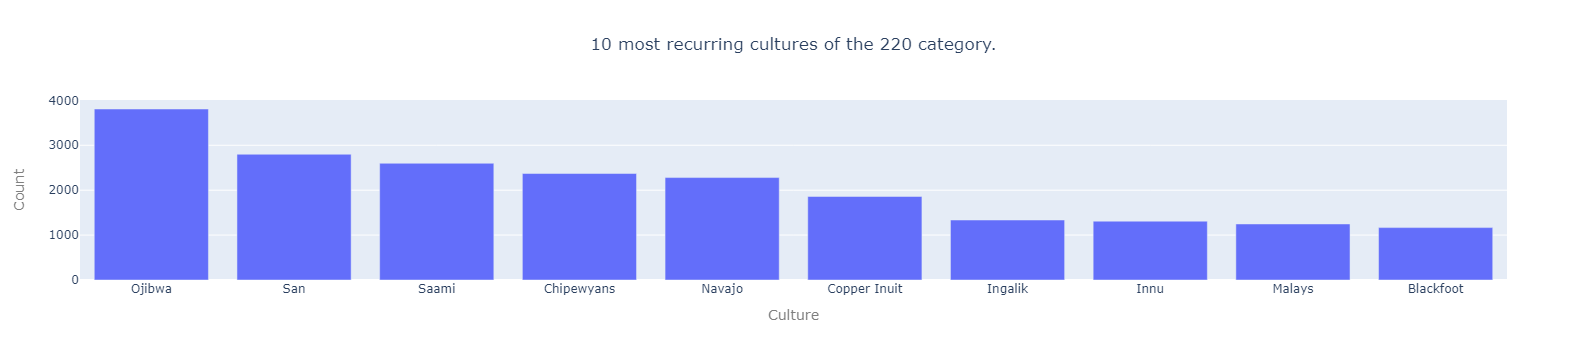

In [12]:

sorted_culture_counts = sorted(list(df.groupby('culture')['ocms'].count().items()), reverse=True,
   key=lambda x: x[1])
               
layout = go.Layout(
    height=400,
    # autosize=False,
    yaxis=dict(title = go.layout.yaxis.Title(text='Count', font=dict(size=14, color='#7f7f7f'))),
    xaxis=dict(title = go.layout.xaxis.Title(text='Culture', font=dict(size=14, color='#7f7f7f')))
)

fig = go.Figure(
    data=[go.Bar(x=[l for l, _ in sorted_culture_counts[:N_TO_SELECT]], 
                 y=[count for _, count in sorted_culture_counts[:N_TO_SELECT]])],
    layout=layout,
    layout_title=f'{N_TO_SELECT} most recurring cultures of the {chosen_cat} category.',
    layout_title_x=0.5,
)

fig.show()

# if save:
#     fig.save(title + '.png')
    

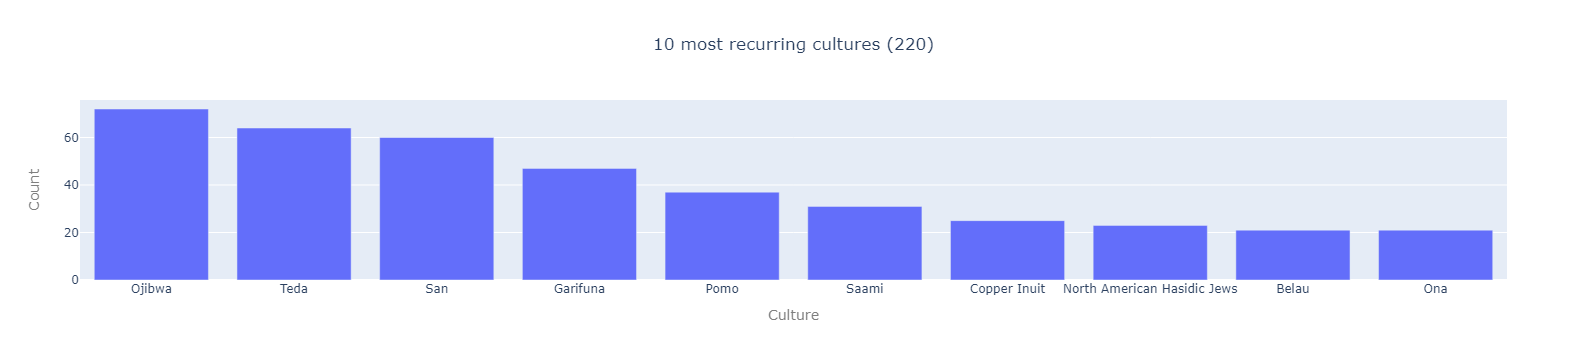

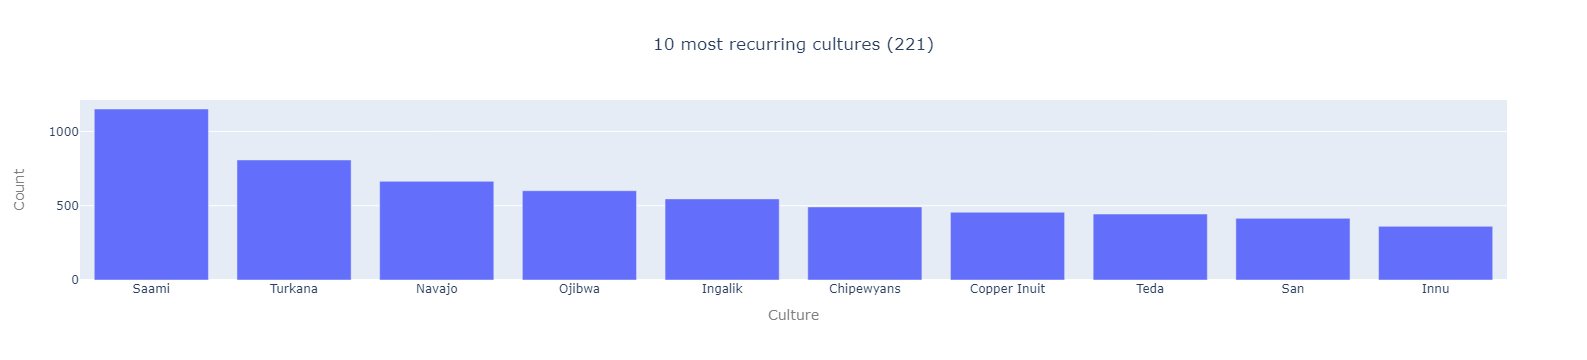

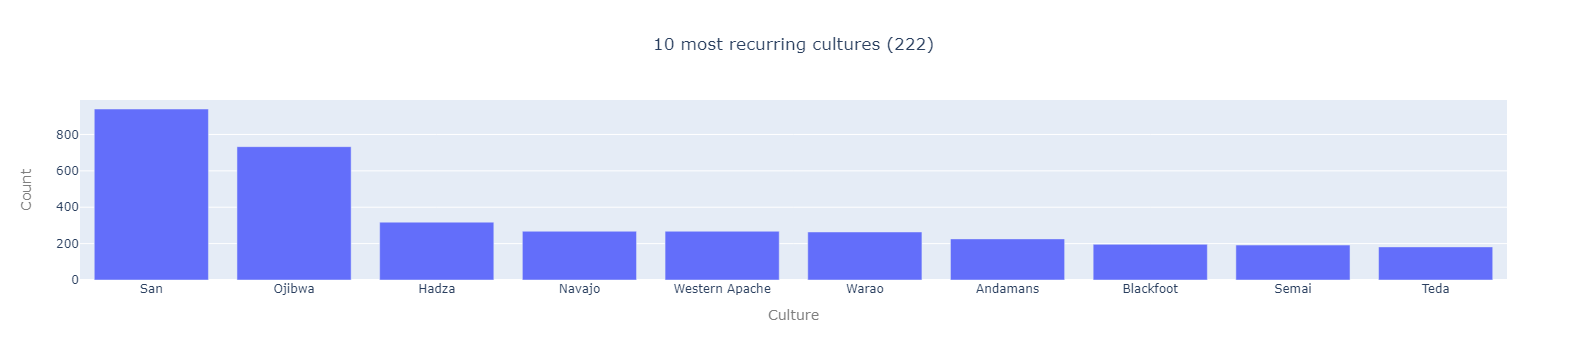

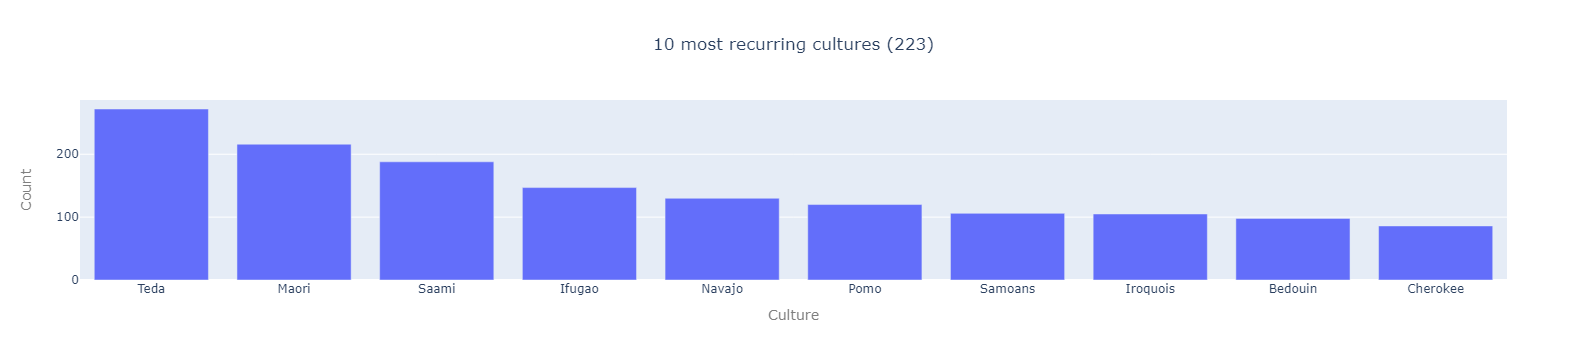

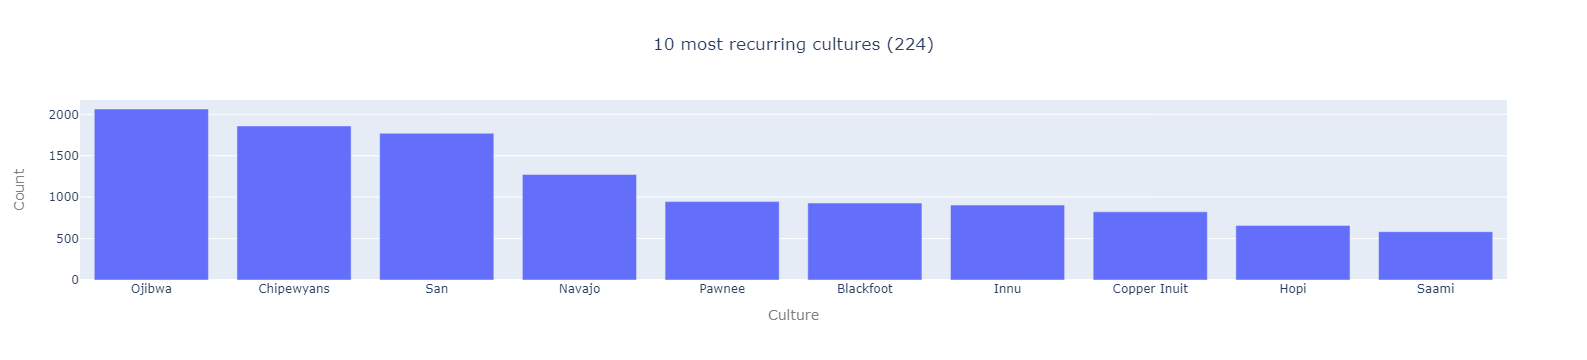

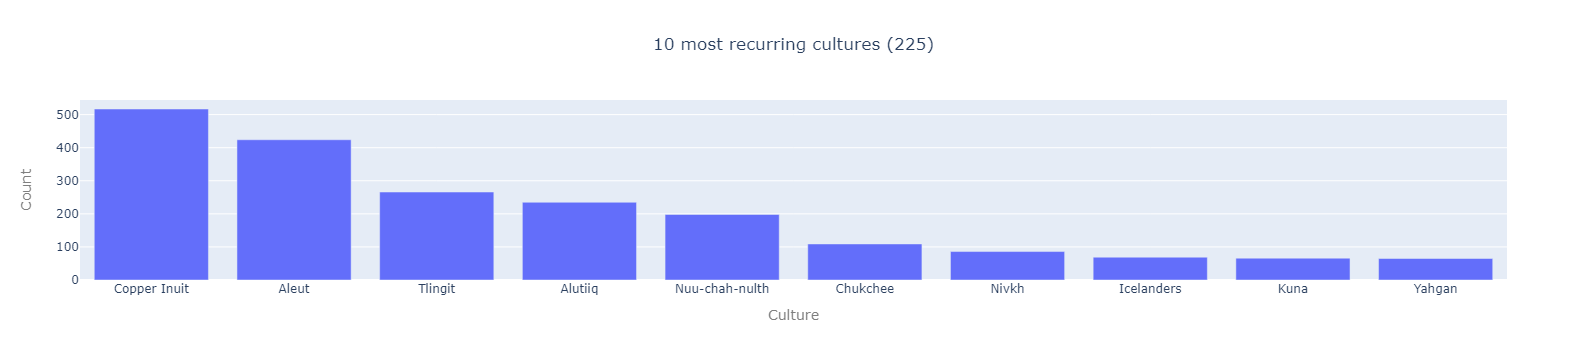

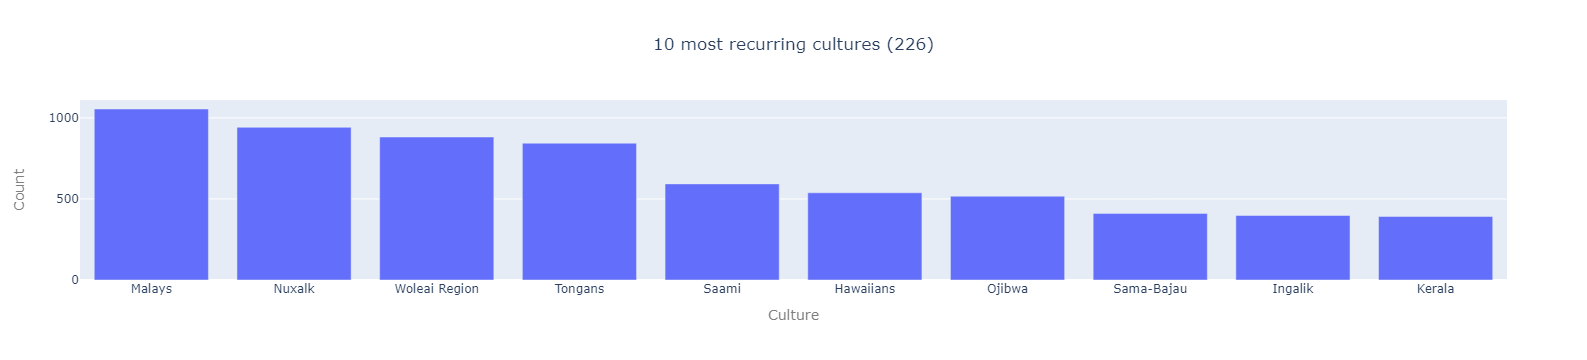

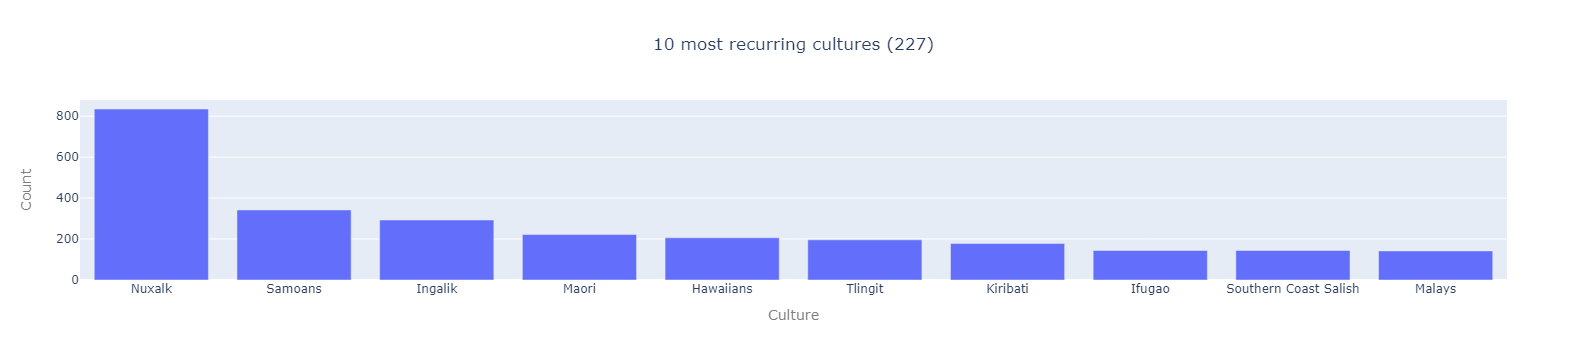

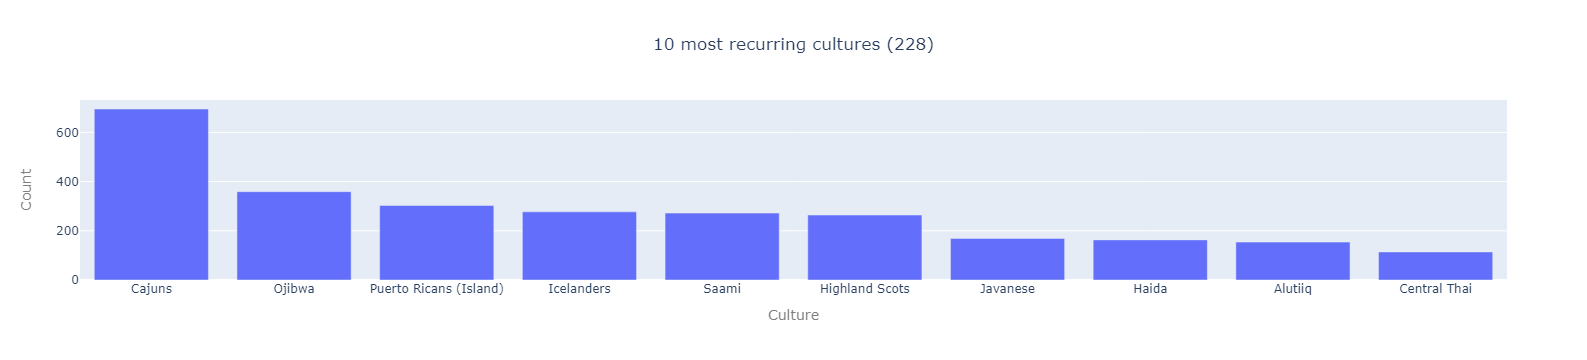

In [13]:
cultures = {}
for i in range(chosen_cat, chosen_cat+10):
    df_i = df[df.apply(lambda x: i in x.ocms_list, axis=1)]

    
    sorted_culture_counts = sorted(list(df_i.groupby('culture')['ocms'].count().items()), reverse=True,
       key=lambda x: x[1])

    cultures[i] = sorted_culture_counts
    
    if not sorted_culture_counts:
        continue
        
    layout = go.Layout(
        height=400,
        # autosize=False,
        yaxis=dict(title = go.layout.yaxis.Title(text='Count', font=dict(size=14, color='#7f7f7f'))),
        xaxis=dict(title = go.layout.xaxis.Title(text='Culture', font=dict(size=14, color='#7f7f7f')))
    )
    
    fig = go.Figure(
        data=[go.Bar(x=[l for l, _ in sorted_culture_counts[:N_TO_SELECT]], 
                     y=[count for _, count in sorted_culture_counts[:N_TO_SELECT]])],
        layout=layout,
        layout_title=f'{N_TO_SELECT} most recurring cultures ({i})',
        layout_title_x=0.5,
    )
    
    fig.show()



In [14]:
common_cultures = defaultdict(int)
for k, v in cultures.items():
    for c in v:
        common_cultures[c[0]] += 1

## Common Cultures
The following is the plots of the count of cultures that are common across all subcategories of the chosen category.

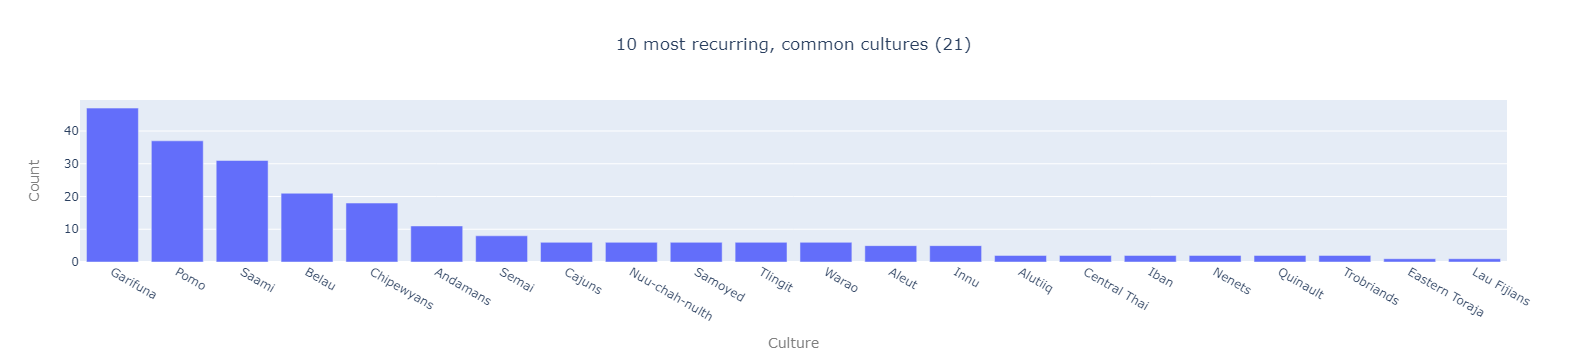

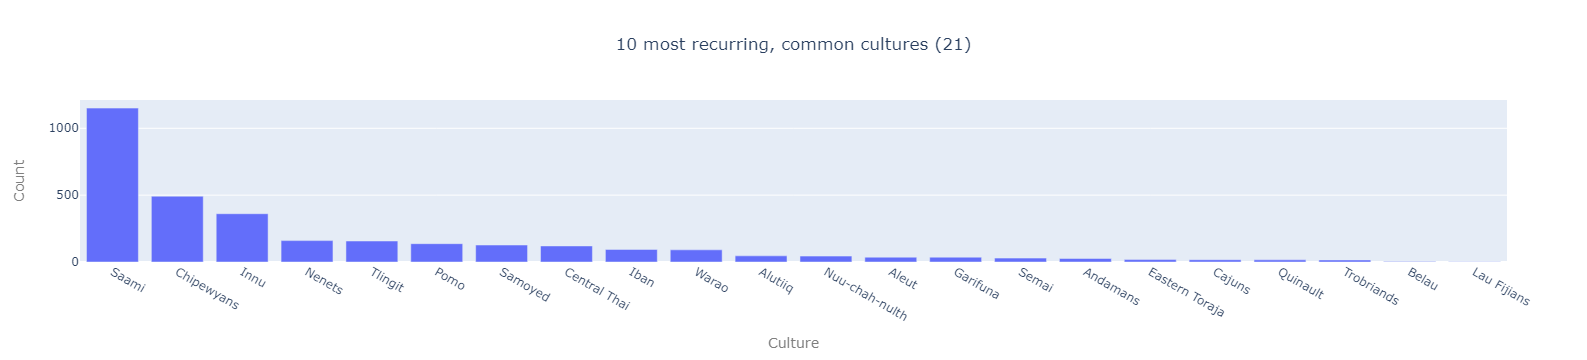

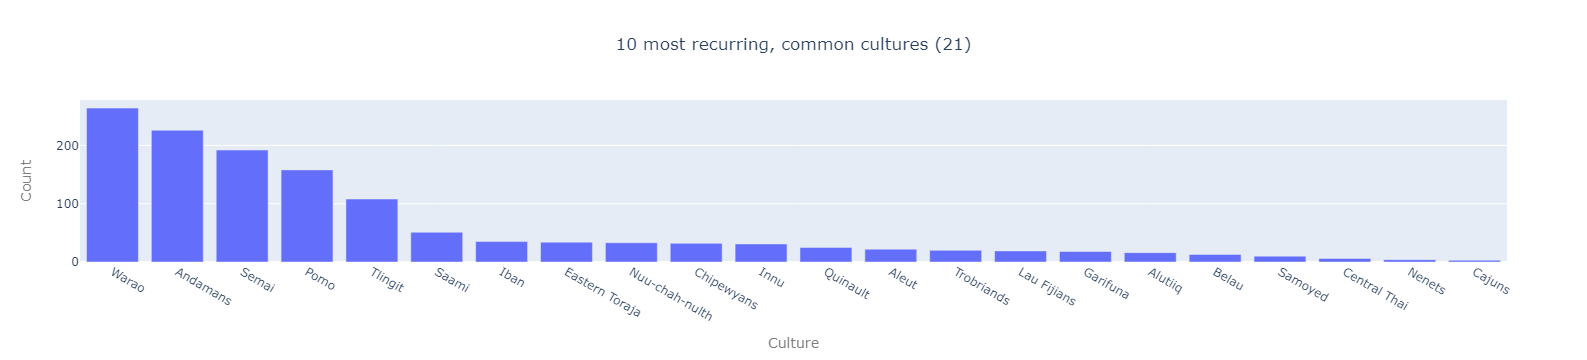

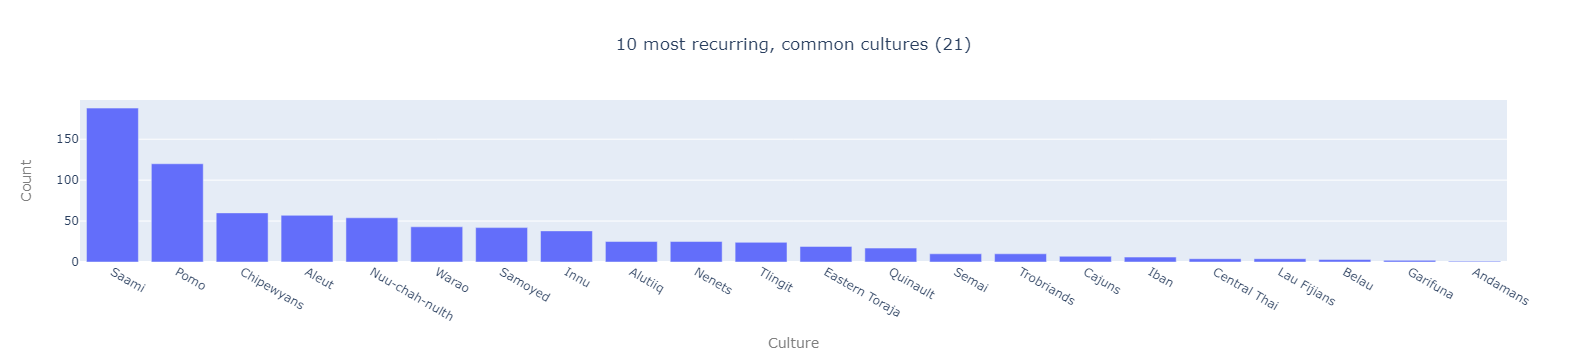

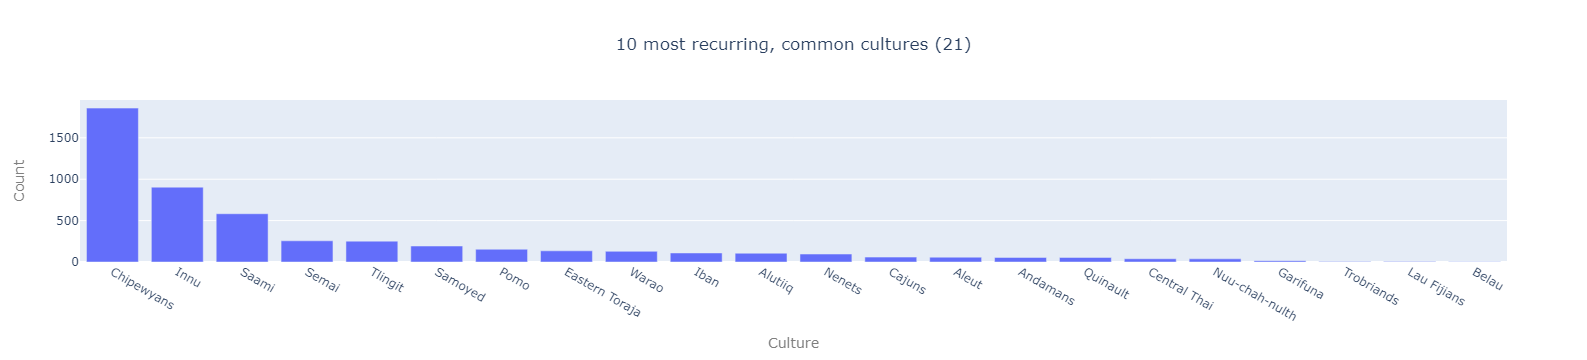

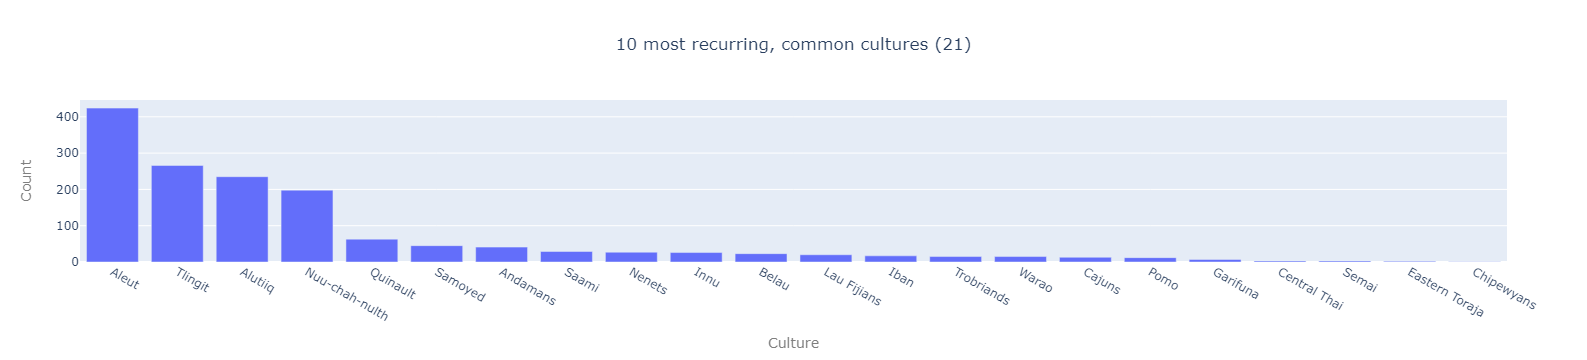

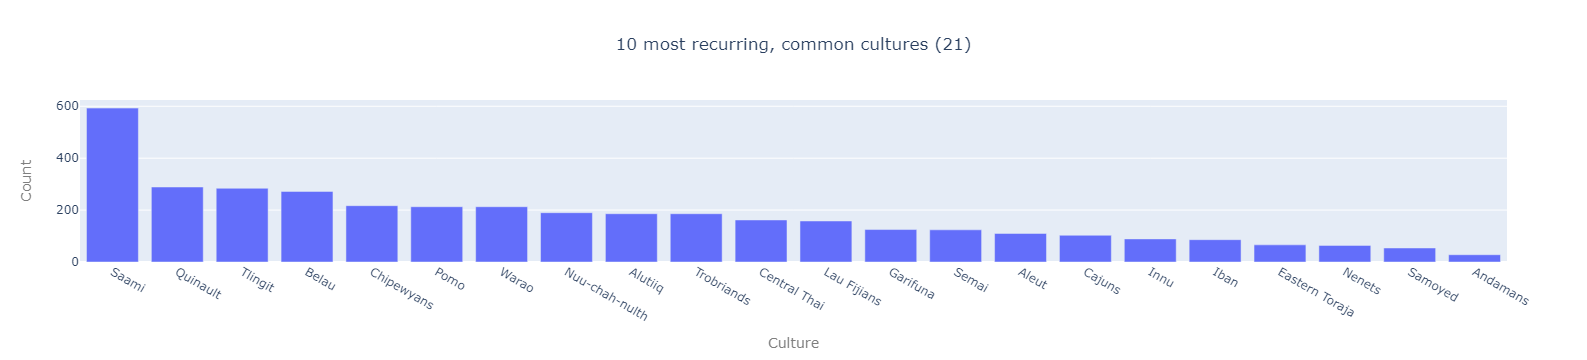

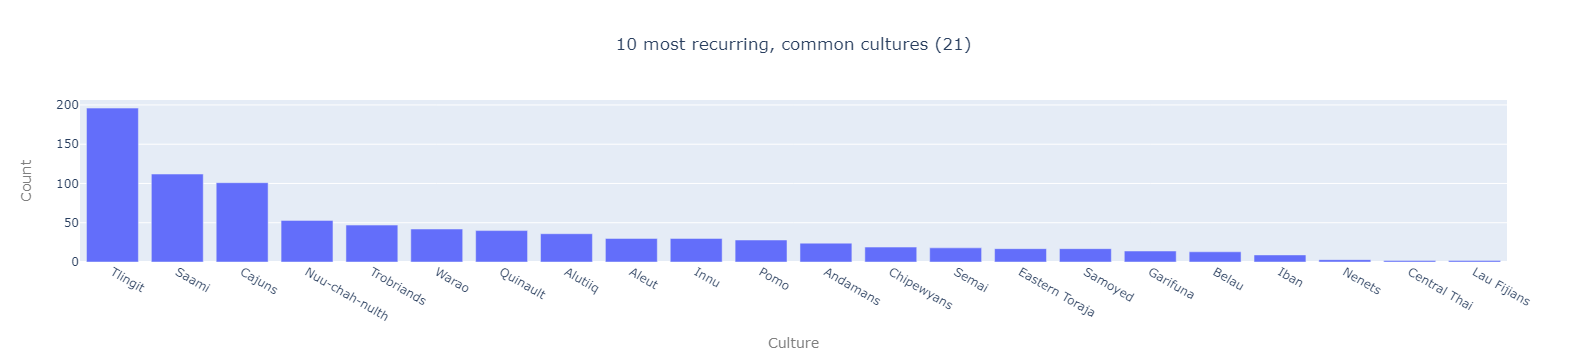

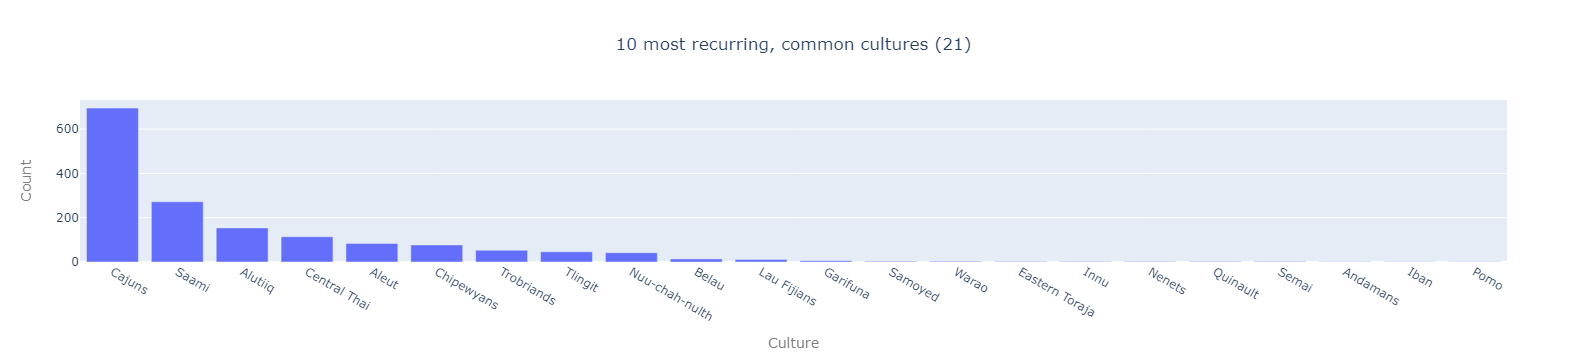

In [15]:
max_culture = max(common_cultures.values())
max_cultures = list(filter(lambda x: x[1] == max_culture, common_cultures.items()))

score_common_cultures_idx = defaultdict(int)
score_common_cultures = defaultdict(int)

for i in range(chosen_cat, chosen_cat + 10):
    curr_cultures = cultures[i]
    if not curr_cultures:
        continue
        
    curr_cultures = list(filter(lambda x: np.any([i[0] == x[0] for i in max_cultures]), 
                           curr_cultures))


    # record the score; closer to 0, better score.
    for i, culture in enumerate(curr_cultures):
        score_common_cultures_idx[culture[0]] += i
        score_common_cultures[culture[0]] += culture[1]

    
    layout = go.Layout(
        height=400,
        # autosize=False,
        yaxis=dict(title = go.layout.yaxis.Title(text='Count', font=dict(size=14, color='#7f7f7f'))),
        xaxis=dict(title = go.layout.xaxis.Title(text='Culture', font=dict(size=14, color='#7f7f7f')))
    )
    
    fig = go.Figure(
        data=[go.Bar(x=[l for l, _ in curr_cultures[:len(max_cultures)]], 
                     y=[count for _, count in curr_cultures[:len(max_cultures)]])],
        layout=layout,
        layout_title=f'{N_TO_SELECT} most recurring, common cultures ({i})',
        layout_title_x=0.5,
    )
    
    fig.show()



## Culture importance
Not sure which way is better:
- based on counts
- based on index in all subcats. )

In [16]:
score_common_cultures.keys()

dict_keys(['Garifuna', 'Pomo', 'Saami', 'Belau', 'Chipewyans', 'Andamans', 'Semai', 'Cajuns', 'Nuu-chah-nulth', 'Samoyed', 'Tlingit', 'Warao', 'Aleut', 'Innu', 'Alutiiq', 'Central Thai', 'Iban', 'Nenets', 'Quinault', 'Trobriands', 'Eastern Toraja', 'Lau Fijians'])

In [22]:
print([x for x, _ in sorted(score_common_cultures.items(), key=lambda x: x[1], reverse=True)][:10])

['Saami', 'Chipewyans', 'Innu', 'Tlingit', 'Cajuns', 'Pomo', 'Aleut', 'Warao', 'Alutiiq', 'Nuu-chah-nulth']


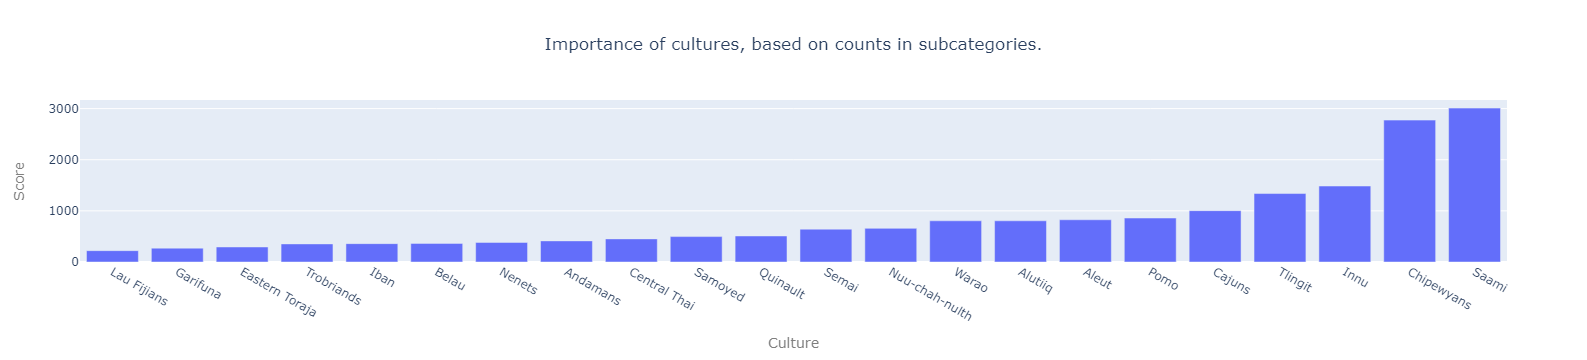

In [41]:
sorted_score_common_culture = sorted(score_common_cultures.items(), key=lambda x: x[1])


layout = go.Layout(
    height=400,
    # autosize=False,
    yaxis=dict(title = go.layout.yaxis.Title(text='Score', font=dict(size=14, color='#7f7f7f'))),
    xaxis=dict(title = go.layout.xaxis.Title(text='Culture', font=dict(size=14, color='#7f7f7f')))
)

fig = go.Figure(
    data=[go.Bar(x=[l for l, _ in sorted_score_common_culture[:len(max_cultures)]], 
                 y=[count for _, count in sorted_score_common_culture[:len(max_cultures)]])],
    layout=layout,
    layout_title=f'Importance of cultures, based on counts in subcategories.',
    layout_title_x=0.5,
)

fig.show()



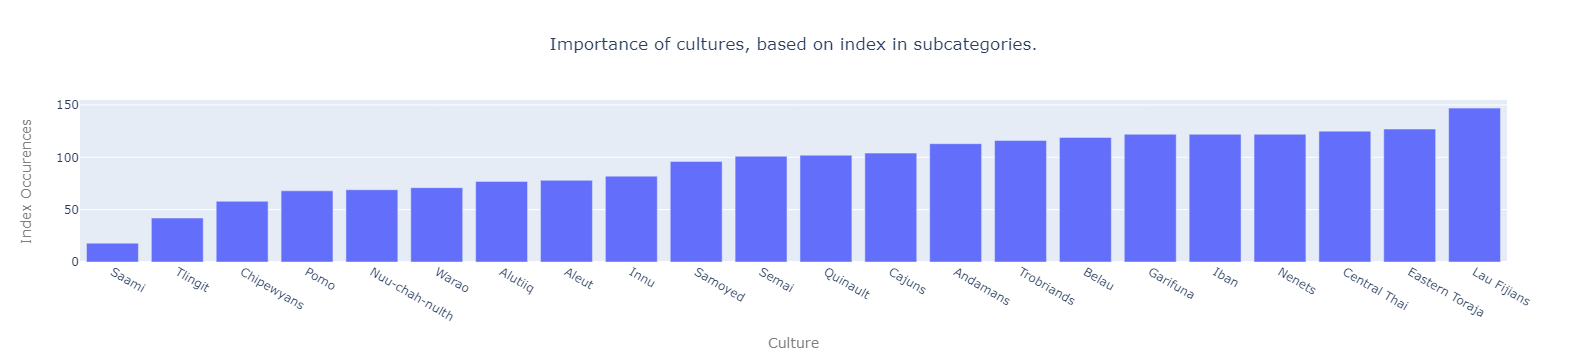

In [45]:
sorted_score_common_culture = sorted(score_common_cultures_idx.items(), key=lambda x: x[1])


layout = go.Layout(
    height=400,
    # autosize=False,
    yaxis=dict(title = go.layout.yaxis.Title(text='Index Occurences', font=dict(size=14, color='#7f7f7f'))),
    xaxis=dict(title = go.layout.xaxis.Title(text='Culture', font=dict(size=14, color='#7f7f7f')))
)

fig = go.Figure(
    data=[go.Bar(x=[l for l, _ in sorted_score_common_culture[:len(max_cultures)]], 
                 y=[count for _, count in sorted_score_common_culture[:len(max_cultures)]])],
    layout=layout,
    layout_title=f'Importance of cultures, based on index in subcategories.',
    layout_title_x=0.5,
)

fig.show()



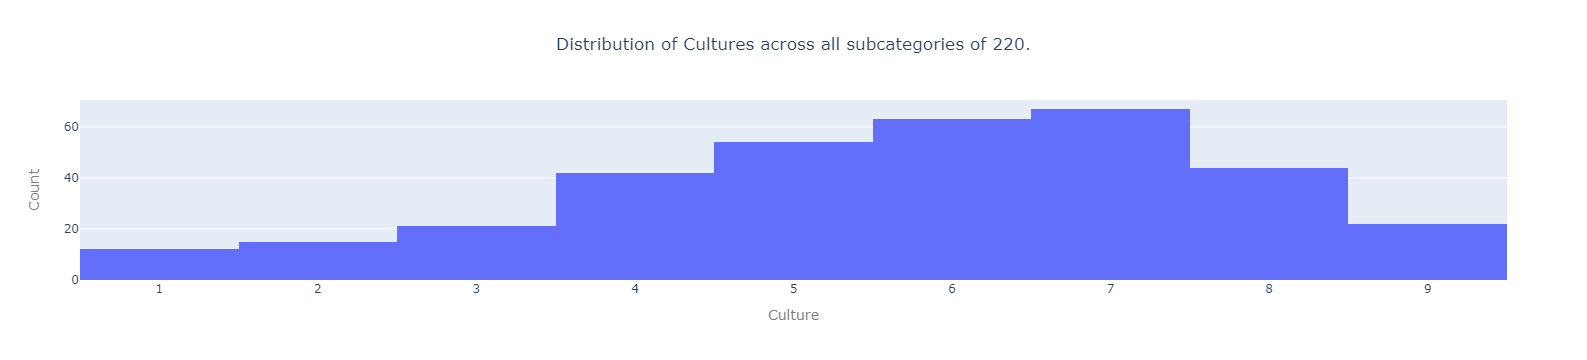

In [109]:

sorted_common_culture_counts = sorted(common_cultures.items(), reverse=True,
   key=lambda x: x[1])


layout = go.Layout(
    height=400,
    # autosize=False,
    yaxis=dict(title = go.layout.yaxis.Title(text='Count', font=dict(size=14, color='#7f7f7f'))),
    xaxis=dict(title = go.layout.xaxis.Title(text='Culture', font=dict(size=14, color='#7f7f7f')))
)

fig = go.Figure(
    data=[go.Histogram(x=[i for _, i in sorted_common_culture_counts])],
    layout=layout,
    layout_title=f'Distribution of Cultures across all subcategories of {chosen_cat}.',
    layout_title_x=0.5,
)

fig.show()



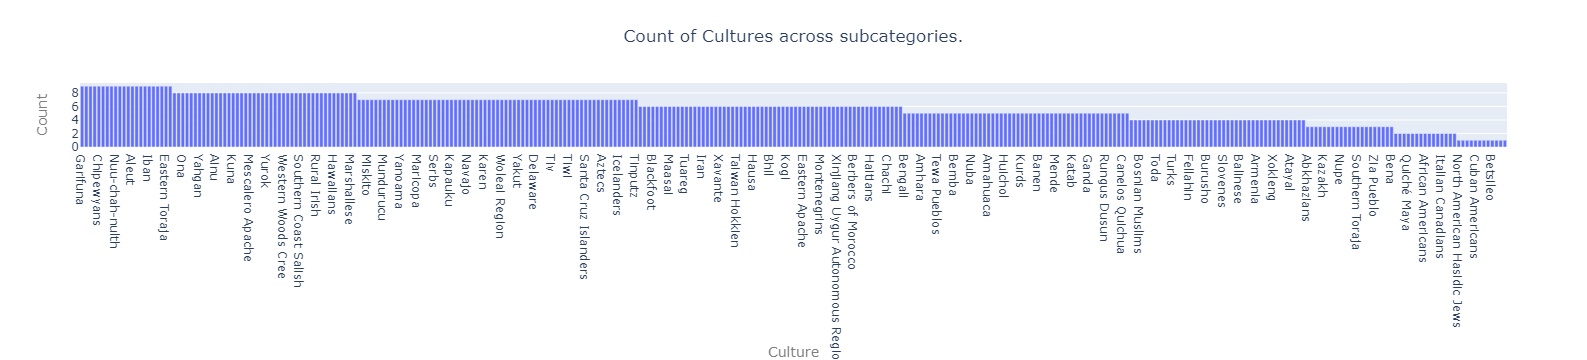

In [72]:
layout = go.Layout(
    height=400,
    # autosize=False,
    yaxis=dict(title = go.layout.yaxis.Title(text='Count', font=dict(size=14, color='#7f7f7f'))),
    xaxis=dict(title = go.layout.xaxis.Title(text='Culture', font=dict(size=14, color='#7f7f7f')))
)

fig = go.Figure(
    data=[go.Bar(x=[l for l, _ in sorted_common_culture_counts], 
                     y=[count for _, count in sorted_common_culture_counts])],
    layout=layout,
    layout_title=f'Count of Cultures across subcategories.',
    layout_title_x=0.5,
)

fig.show()

